In [73]:
%run pylib/summary
self = Summary(show_confusion=False, #summary_file=None,
             title="""Summarize HCU properties.""")
fignum=11
df = self.df.copy()
show(""" See D.Smith et al [Searching a Thousand Radio Pulsars for Gamma-ray Emission](https://arxiv.org/abs/1812.00719v1)<br>
[Kerr talk](https://fermi.gsfc.nasa.gov/science/mtgs/symposia/2018/program/wed/Matthew_Kerr.pdf)""")


# Summarize HCU properties.

<h5 style="text-align:right; margin-right:15px"> 2023-09-25 16:52</h5>

* Read file `files/summary.csv` with 2615 sources.

See D.Smith et al [Searching a Thousand Radio Pulsars for Gamma-ray Emission](https://arxiv.org/abs/1812.00719v1)<br>
[Kerr talk](https://fermi.gsfc.nasa.gov/science/mtgs/symposia/2018/program/wed/Matthew_Kerr.pdf)

In [2]:
dr4 =  Fermi4FGL('dr4')
sfplec = [dr4.get_specfunc(name, 'PLEC4') for name in df.index]
sflp = [dr4.get_specfunc(name, 'LP') for name in df.index]

Loaded Fermi 4FGL gll_psc_dr4.fit: 7195 entries


## Curvature vs peak energy for pulsar-like sources

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0963ffbaf0>
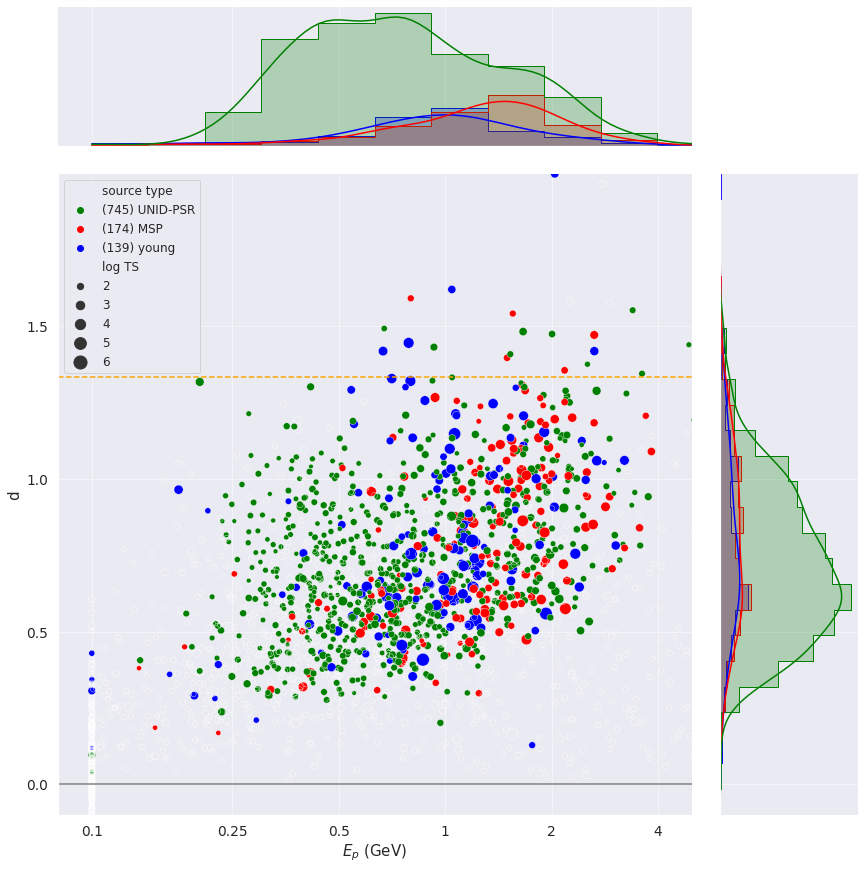

In [3]:
self.show_d_vs_ep(self.df)

In [79]:
 (180/np.pi)**-2# *4*np.pi

0.00030461741978670857

In [4]:
df[df['source type']=='young'].query('Ep<0.25 & d>0.6')

,glon,glat,ts,r95,d,Fp,Ep,source type,log_epeak,log_fpeak,log TS,abs_sin_b
name,,,,,,,,,,,,
4FGL J0659.7+1416,201.036,8.213,2350.820,0.045,0.965,176.318,0.176,young,-0.754487,2.246297,3.371219,0.142854
4FGL J2208.1+4058,92.680,-12.163,79.747,0.236,0.896,2.900,0.213,young,-0.671620,0.462398,1.901714,0.210694


In [5]:
dr4.loc['4FGL J2208.1+4058']

ra                                                 332.039886
dec                                                   40.9744
glat                                               -12.093593
glon                                                92.618408
r95                                                    0.2461
specfunc        PLSuperExpCutoff4(1.78e-12, 2.97, 1.10, 0.67)
pivot                                              701.047363
eflux                                                     0.0
significance                                         8.509881
variability                                         40.450172
curvature                                             0.89595
curv_unc                                              0.31724
flags                                                     {9}
assoc_prob                                                1.0
assoc1_name                                    PSR J2208+4056
class1                                                    PSR
Name: 4F

## Curvature vs peak energy for pulsar-like sources

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f09601a1c30>
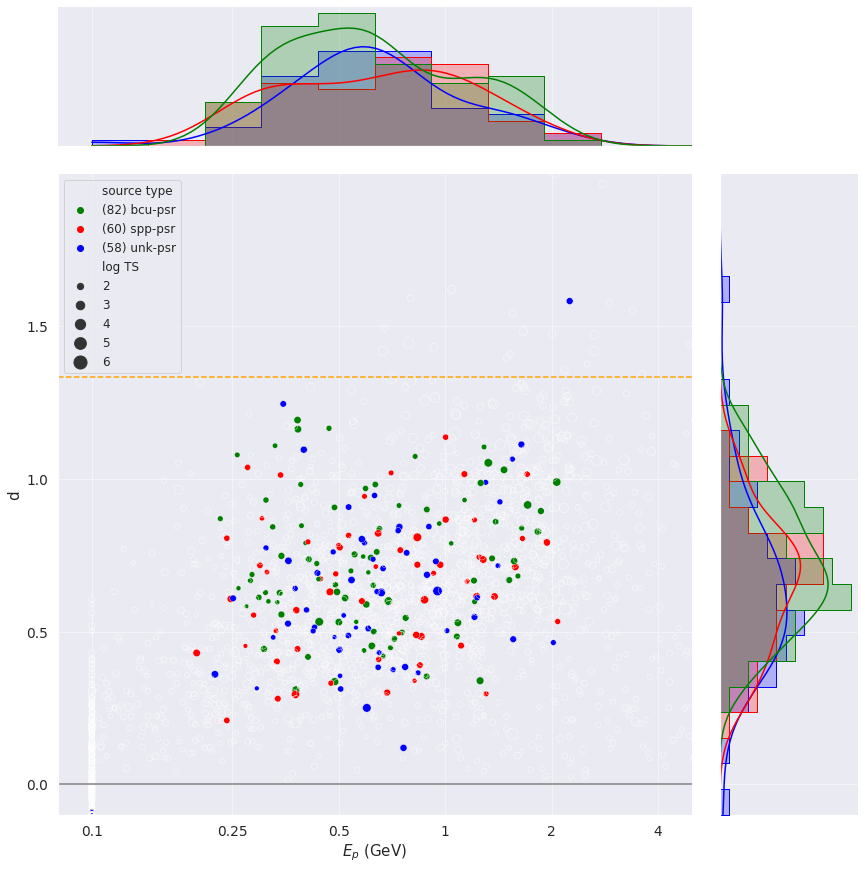

In [6]:
self.show_d_vs_ep(df, hue_kw=dict(hue_order='bcu-psr spp-psr unk-psr'.split()))

In [7]:
psr = df[np.isin(df['source type'].values, 'young MSP'.split())].copy()#.iloc[:,:-4].copy(); len(psr)

psr['psr_name'] = list(map(lambda s:s[:14], dr4.loc[psr.index,'assoc1_name'] ))
psr['class1'] = dr4.loc[psr.index,'class1']
psr.groupby('class1').size()

class1
MSP    136
PSR    134
msp     39
psr      4
dtype: int64

SED plots for low-peak-energy pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f094ce1cdc0>
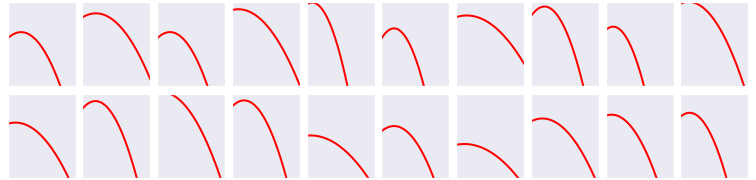

,glon,glat,ts,r95,d,Fp,Ep
name,,,,,,,
4FGL J1555.7-2908,344.477,18.482,183.391,0.049,0.501,1.143,0.394
4FGL J1228.0-4853,298.966,13.791,3778.356,0.018,0.319,28.043,0.396
4FGL J1431.4-4711,320.036,12.328,178.753,0.062,0.549,1.153,0.369
4FGL J0540.3-6920,279.704,-31.501,845.799,0.026,0.290,56.319,0.195
4FGL J0659.7+1416,201.036,8.213,2350.820,0.045,0.965,176.318,0.176
4FGL J1253.3-5816,303.211,4.601,112.633,0.105,0.927,2.169,0.360
4FGL J1341.7-6216,308.745,0.003,82.317,0.049,0.210,19.472,0.292
4FGL J1356.9-6432,309.890,-2.549,1120.871,0.037,0.757,89.557,0.397
4FGL J2208.1+4058,92.680,-12.163,79.747,0.236,0.896,2.900,0.213


In [8]:
show('SED plots for low-peak-energy pulsars')# UNID-PSR ')
lowep = psr.query('0.15<Ep<0.4').sort_values('class1').iloc[:,:-7]
sedplotgrid(lowep, )
show(lowep)

SED plots for narrow pulsars

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f094c4fe800>
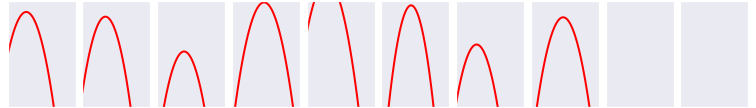

,glon,glat,ts,r95,d,Fp,Ep
name,,,,,,,
4FGL J0622.2+3749,175.874,10.974,3061.589,0.024,1.419,46.133,0.667
4FGL J1056.9-5852,288.596,0.770,643.260,0.040,1.621,24.459,1.044
4FGL J1402.7+1306,356.455,68.207,145.839,0.061,1.542,0.221,1.553
4FGL J1615.3-5136,331.763,-0.533,1681.386,0.019,1.419,169.274,2.642
4FGL J1741.9-2054,6.420,4.915,18203.351,0.014,1.446,3113.626,0.788
4FGL J1827.4-1445,17.092,-1.504,802.573,0.028,2.000,113.299,2.042
4FGL J2029.5-4237,358.205,-35.509,158.754,0.074,1.592,0.566,0.799
4FGL J2035.0+3632,76.601,-2.346,1028.033,0.024,1.472,22.442,2.640


In [9]:
show('SED plots for narrow pulsars')# UNID-PSR ')
narrow = psr.query('d>1.4').iloc[:,:-7]
sedplotgrid(narrow,)
show(narrow)

In [24]:
from pylib.catalogs import BigFile
bf = BigFile()
bf.set_index('PSRJ', inplace=True)

Loaded BigFile v20210921083114: 3281 entries


In [52]:
pname = np.array(list(map(lambda x: x[4:],psr.psr_name)))
goodpname=  pname[np.isin(pname, bf.index)]
goodpsr = psr.loc[np.isin(pname, bf.index)].copy(); goodpsr.head()
goodpsr['log_Edot'] = np.log10(bf.loc[goodpname, 'EDOT']).values
goodpsr

,glon,glat,ts,r95,d,Fp,Ep,source type,log_epeak,log_fpeak,log TS,abs_sin_b,psr_name,class1,log_Edot
name,,,,,,,,,,,,,,,
4FGL J0002.8+6217,117.325,-0.054,1400.081,0.029,0.771,23.180,0.869,young,-0.060980,1.365113,3.146153,0.000942,PSR J0002+6216,PSR,35.185900
4FGL J0007.0+7303,119.663,10.463,385259.767,0.008,0.559,23705.986,1.928,young,0.285107,4.374858,5.585754,0.181601,PSR J0007+7303,PSR,35.649099
4FGL J0023.4+0920,111.384,-52.870,864.019,0.030,0.829,3.716,1.131,MSP,0.053463,0.570076,2.936523,0.797268,PSR J0023+0923,MSP,34.201191
4FGL J0030.4+0451,113.131,-57.612,26115.682,0.012,0.857,419.849,1.200,MSP,0.079181,2.623093,4.416901,0.844440,PSR J0030+0451,MSP,33.542508
4FGL J0034.3-0534,111.491,-68.071,4149.070,0.019,0.505,21.909,0.773,MSP,-0.111821,1.340623,3.617951,0.927647,PSR J0034-0534,MSP,34.472826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4FGL J1853.3-0005,33.068,-0.458,55.956,0.064,1.054,2.736,2.818,young,0.449941,0.437116,1.747847,0.007994,PSR J1853-0004,PSR,35.323754
4FGL J1858.3-2216,13.576,-11.391,1037.275,0.025,1.099,11.484,1.563,MSP,0.193959,1.060093,3.015894,0.197503,PSR J1858-2216,MSP,34.051474
4FGL J2017.4+0602,48.630,-16.032,9137.934,0.012,0.851,117.878,2.621,MSP,0.418467,2.071433,3.960848,0.276174,PSR J2017+0603,MSP,34.113562


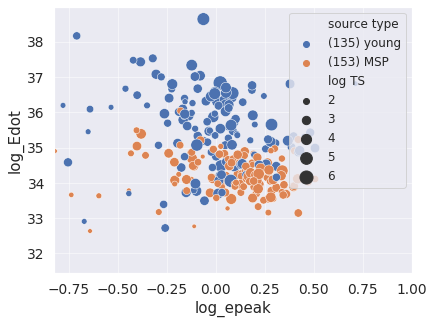

In [70]:
size_kw = dict(size='log TS', sizes=(20,200) )
ax=sns.scatterplot(goodpsr, y='log_Edot', x='log_epeak', hue='source type', **size_kw)
ax.set(xlim=np.log10((0.15,10)));
update_legend(ax, goodpsr,hue='source type', loc='upper right', fontsize=12)

In [36]:
psr.iloc[list(np.isin(pname, bf.index))] = bf

,glon,glat,ts,r95,d,Fp,Ep,source type,log_epeak,log_fpeak,log TS,abs_sin_b,psr_name,class1
name,,,,,,,,,,,,,,
4FGL J0002.8+6217,117.325,-0.054,1400.081,0.029,0.771,23.180,0.869,young,-0.060980,1.365113,3.146153,0.000942,PSR J0002+6216,PSR
4FGL J0007.0+7303,119.663,10.463,385259.767,0.008,0.559,23705.986,1.928,young,0.285107,4.374858,5.585754,0.181601,PSR J0007+7303,PSR
4FGL J0023.4+0920,111.384,-52.870,864.019,0.030,0.829,3.716,1.131,MSP,0.053463,0.570076,2.936523,0.797268,PSR J0023+0923,MSP
4FGL J0030.4+0451,113.131,-57.612,26115.682,0.012,0.857,419.849,1.200,MSP,0.079181,2.623093,4.416901,0.844440,PSR J0030+0451,MSP
4FGL J0034.3-0534,111.491,-68.071,4149.070,0.019,0.505,21.909,0.773,MSP,-0.111821,1.340623,3.617951,0.927647,PSR J0034-0534,MSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4FGL J1853.3-0005,33.068,-0.458,55.956,0.064,1.054,2.736,2.818,young,0.449941,0.437116,1.747847,0.007994,PSR J1853-0004,PSR
4FGL J1858.3-2216,13.576,-11.391,1037.275,0.025,1.099,11.484,1.563,MSP,0.193959,1.060093,3.015894,0.197503,PSR J1858-2216,MSP
4FGL J2017.4+0602,48.630,-16.032,9137.934,0.012,0.851,117.878,2.621,MSP,0.418467,2.071433,3.960848,0.276174,PSR J2017+0603,MSP


## Restrict to DR3

Loaded Fermi 4FGL gll_psc_dr3.fit: 6659 entries


## Curvature vs peak energy for pulsar-like sources

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f09600e3d30>
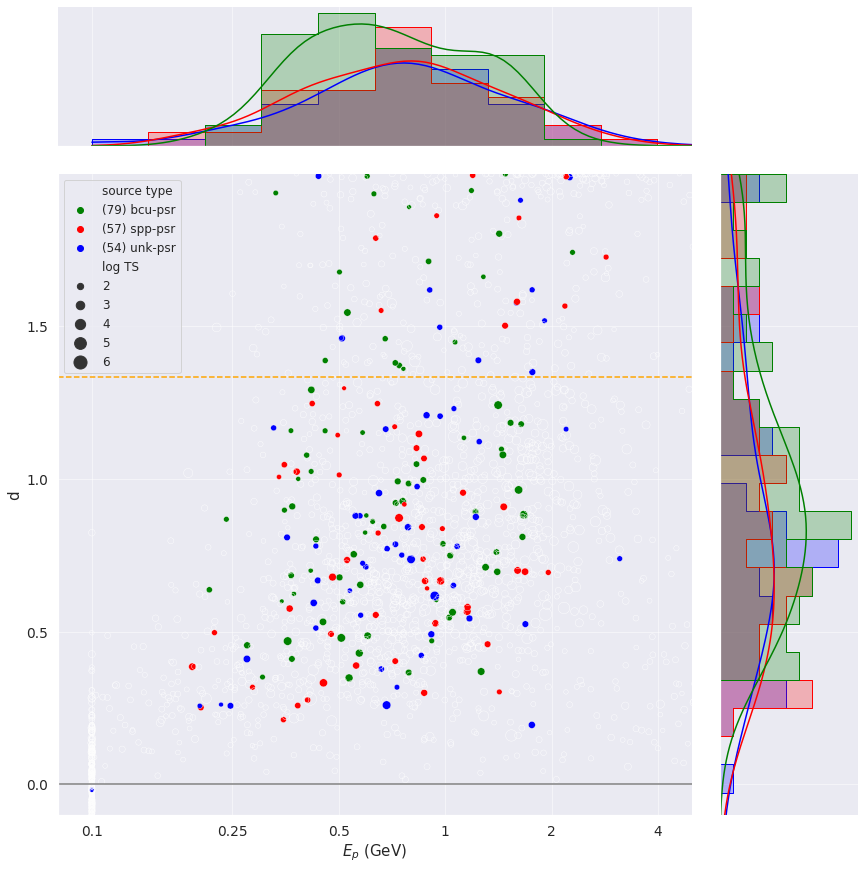

In [71]:
show('## Restrict to DR3')
from pylib.catalogs import  Fermi4FGL
dr3 = Fermi4FGL('dr3')
df3 = self.df[np.isin(df.index, dr3.index)].copy() 
df3['sf']=[dr3.get_specfunc(name, 'LP') for name in df3.index ]
df3['d'] = df3.sf.apply(lambda f: f.curvature())
df3['log_epeak'] = df3.sf.apply(lambda f: f.epeak)

self.show_d_vs_ep(df3)

## Compare LP with PLEC

Loaded Fermi 4FGL gll_psc_dr4.fit: 7195 entries


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f0964c1f940>
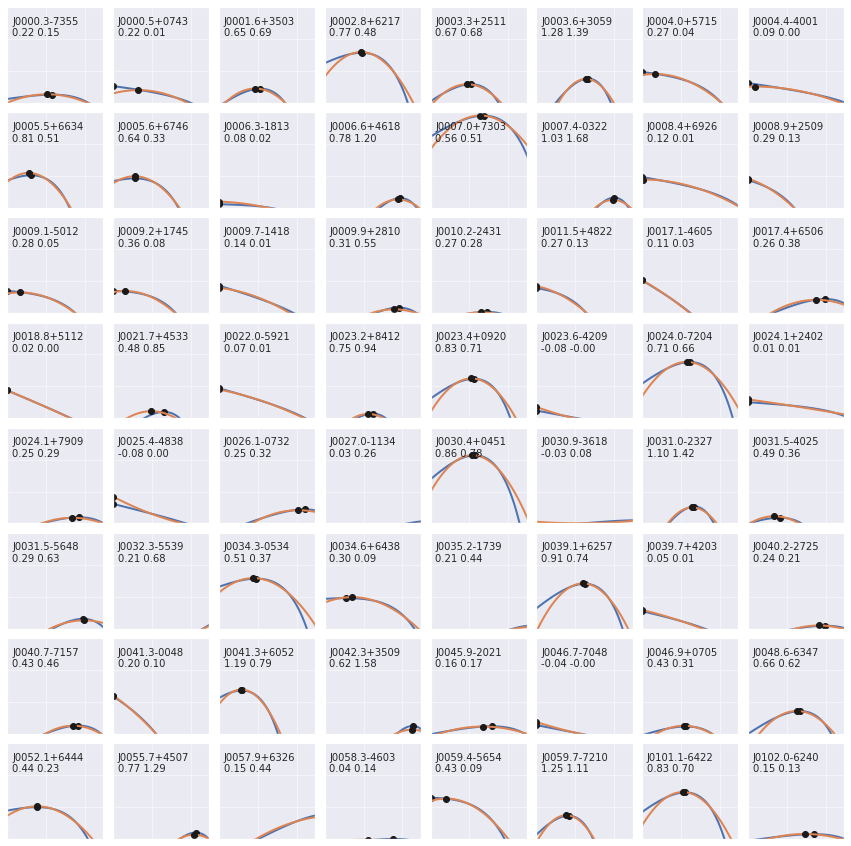

In [12]:
show(f"""## Compare LP with PLEC""")
dr4 =  Fermi4FGL('dr4')
names  = self.df.index[np.isin(self.df.index, dr4.index)]


fig, axx = plt.subplots(8,8, figsize=(15,15),
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for ax, name in zip(axx.flat, names):
    
    sfplec = dr4.get_specfunc(name, 'PLEC4')
    sflp = dr4.get_specfunc(name, 'LP')
    ep = sfplec.epeak
    d, dp = sflp.curvature(), sfplec.curvature(10**ep*1e3)
    # print(name, ep, d, dp)
    sfplec.sed_plot(ax=ax, plot_epeak=True) #label='PLEC')
    sflp.sed_plot(ax=ax, plot_epeak=True ) #label='LP')
    # logep = sflp.epeak
    # ax.plot(logep, sflp(logep), 'ok')
    ax.text(0.05, 0.9, f'{name[5:]}\n{d:.2f} {dp:.2f}', transform=ax.transAxes, fontsize=10, va='top')
    ax.set(xlim=(0.1, 30), ylim=(0.1,100),
           xticklabels=[], yticklabels=[], xlabel='',ylabel='')
show(fig)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f093b871de0>
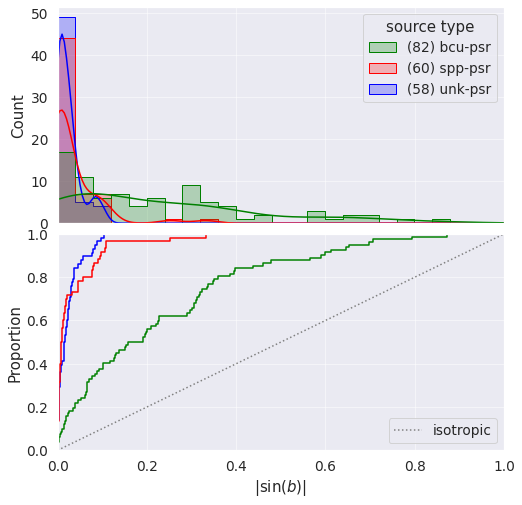

In [20]:
# data=df.query('association=="bcu"')
# hue_kw=dict(hue='source type',  )

def plot_abs_sin_b(self, data=None, hue_kw={}):
    if data is None: data=self.df
    hkw = self.hue_kw
    hkw.update(hue_kw)
        
    x = 'abs_sin_b'
    fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8, 8), sharex=True,
                                gridspec_kw=dict(hspace=0.05))
    ax=sns.histplot(data, ax=ax1, x=x, **hkw, bins=25, kde=True, element='step')
    update_legend(ax, df, hkw['hue'])
    
    ax=sns.ecdfplot(data, ax=ax2, x=x, legend=False,  **hkw)
    ax.plot([0,1], [0,1], ':', color='grey', label='isotropic')
    ax.set(xlabel=r'$|\sin(b)|$', xlim=(0,1),)
    ax.legend()
    return fig
    
show(plot_abs_sin_b(self));